In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import numpy as np
from ast import literal_eval
import matplotlib.pylab as plt

In [146]:
df_coExplode = pd.read_csv('colocation_explode.csv')
df_allSchool = pd.read_csv('2019_-_2020_School_Locations.csv')
df_demography = pd.read_csv('2019-2020Demographic snapshot all.csv')
df_co = pd.read_csv('2019-2020_Co-Location_Reporting.csv')

In [147]:
df_13demography = pd.read_csv('2013-14Demographic_Snapshot_School.csv')

In [150]:
df_13demography.columns = [c.lower().replace(' ', '_') for c in df_13demography.columns]
df_demography.columns = [c.lower().replace(' ', '_') for c in df_demography.columns]

calculate rate of change for demography data first

In [151]:
#left join to 13 data so that we keep only schools that existed all the way
df_bothDemo = pd.merge(df_13demography, df_demography, on = 'dbn',how='left')
df_bothDemo

,dbn,school_name_x,year_x,total_enrollment_x,grade_pk_(half_day_&_full_day)_x,grade_k_x,grade_1_x,grade_2_x,grade_3_x,grade_4_x,...,%_white_y,#_missing_race/ethnicity_data,%_missing_race/ethnicity_data,#_students_with_disabilities_y,%_students_with_disabilities_y,#_english_language_learners_y,%_english_language_learners_y,#_poverty_y,%_poverty_y,economic_need_index_y
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,0.047,0.0,0.000,46.0,0.242,17.0,0.089,155,0.816,0.867
1,01M019,P.S. 019 Asher Levy,2013-14,285,36,39,38,36,45,47,...,0.081,0.0,0.000,94.0,0.398,8.0,0.034,176,0.746,0.704
2,01M020,P.S. 020 Anna Silver,2013-14,631,54,114,111,98,109,71,...,0.067,1.0,0.002,106.0,0.228,61.0,0.131,354,0.763,0.784
3,01M034,P.S. 034 Franklin D. Roosevelt,2013-14,393,18,33,32,35,34,45,...,0.027,0.0,0.000,117.0,0.395,17.0,0.057,Above 95%,0.950,0.950
4,01M063,The STAR Academy - P.S.63,2013-14,179,18,40,33,26,23,20,...,0.074,0.0,0.000,71.0,0.310,5.0,0.022,177,0.773,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,84X705,Family Life Academy Charter School,2013-14,460,0,52,52,52,52,52,...,0.002,0.0,0.000,37.0,0.091,90.0,0.222,376,0.928,0.899
1726,84X706,Harriet Tubman Charter School,2013-14,646,0,74,78,71,74,74,...,0.008,0.0,0.000,61.0,0.092,68.0,0.103,547,0.825,0.890
1727,84X717,Icahn Charter School,2013-14,329,0,36,40,40,37,34,...,0.000,0.0,0.000,21.0,0.065,21.0,0.065,276,0.854,0.824
1728,84X718,Bronx Charter School for Better Learning,2013-14,419,0,85,76,72,72,56,...,0.019,0.0,0.000,71.0,0.124,7.0,0.012,455,0.797,0.645


In [153]:
list(df_bothDemo.columns)

dbn                                  object
school_name_x                        object
year_x                               object
total_enrollment_x                    int64
grade_pk_(half_day_&_full_day)_x      int64
                                     ...   
#_english_language_learners_y       float64
%_english_language_learners_y       float64
#_poverty_y                          object
%_poverty_y                         float64
economic_need_index_y               float64
Length: 82, dtype: object

In [154]:
#get only columns we need
df_changeDemo = df_bothDemo[['dbn','total_enrollment_x','%_students_with_disabilities_x','%_english_language_learners_x','%_poverty_x','economic_need_index_x','total_enrollment_y','%_students_with_disabilities_y','%_english_language_learners_y','%_poverty_y','economic_need_index_y']]

In [121]:
df_changeDemo

,dbn,total_enrollment_x,%_students_with_disabilities_x,%_english_language_learners_x,%_poverty_x,economic_need_index_x,total_enrollment_y,%_students_with_disabilities_y,%_english_language_learners_y,%_poverty_y,economic_need_index_y
0,01M015,190,34.2,10.0,90.0,No Data,190.0,0.242,0.089,81.6%,86.7%
1,01M019,285,31.2,8.8,74.7,No Data,236.0,0.398,0.034,74.6%,70.4%
2,01M020,631,22.8,16.5,71.0,No Data,464.0,0.228,0.131,76.3%,78.4%
3,01M034,393,32.8,6.4,94.9,No Data,296.0,0.395,0.057,Above 95%,Above 95%
4,01M063,179,33.0,4.5,81.0,No Data,229.0,0.310,0.022,77.3%,78.4%
...,...,...,...,...,...,...,...,...,...,...,...
1725,84X705,460,12.8,18.3,89.3,No Data,405.0,0.091,0.222,92.8%,89.9%
1726,84X706,646,13.2,6.3,70.6,No Data,663.0,0.092,0.103,82.5%,89.0%
1727,84X717,329,10.0,2.1,84.5,No Data,323.0,0.065,0.065,85.4%,82.4%
1728,84X718,419,10.0,0.7,82.3,No Data,571.0,0.124,0.012,79.7%,64.5%


In [155]:
df_changeDemo['total_enrollment'] = (df_changeDemo['total_enrollment_y']-df_changeDemo['total_enrollment_x'])/df_changeDemo['total_enrollment_x']

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1269385955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changeDemo['total_enrollment'] = (df_changeDemo['total_enrollment_y']-df_changeDemo['total_enrollment_x'])/df_changeDemo['total_enrollment_x']


In [156]:
df_changeDemo['total_enrollment']

0       0.000000
1      -0.171930
2      -0.264659
3      -0.246819
4       0.279330
          ...   
1725   -0.119565
1726    0.026316
1727   -0.018237
1728    0.362768
1729    0.639498
Name: total_enrollment, Length: 1730, dtype: float64

In [157]:
df_changeDemo['disability'] = (df_changeDemo['%_students_with_disabilities_y']-df_changeDemo['%_students_with_disabilities_x'])/df_changeDemo['%_students_with_disabilities_x']

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/3058436316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changeDemo['disability'] = (df_changeDemo['%_students_with_disabilities_y']-df_changeDemo['%_students_with_disabilities_x'])/df_changeDemo['%_students_with_disabilities_x']


In [158]:
df_changeDemo['ell'] = (df_changeDemo['%_english_language_learners_y']-df_changeDemo['%_english_language_learners_x']/100)/(df_changeDemo['%_english_language_learners_x']/100)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1658834133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changeDemo['ell'] = (df_changeDemo['%_english_language_learners_y']-df_changeDemo['%_english_language_learners_x']/100)/(df_changeDemo['%_english_language_learners_x']/100)


In [137]:
df_changeDemo['ell']

0      -0.110000
1      -0.613636
2      -0.206061
3      -0.109375
4      -0.511111
          ...   
1725    0.213115
1726    0.634921
1727    2.095238
1728    0.714286
1729    0.552941
Name: ell, Length: 1730, dtype: float64

In [159]:
df_changeDemo['poverty'] = (df_changeDemo['%_poverty_y']-df_changeDemo['%_poverty_x']/100)/(df_changeDemo['%_poverty_x']/100)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/424671470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changeDemo['poverty'] = (df_changeDemo['%_poverty_y']-df_changeDemo['%_poverty_x']/100)/(df_changeDemo['%_poverty_x']/100)


In [161]:
list(df_changeDemo.columns)

['dbn',
 'total_enrollment_x',
 '%_students_with_disabilities_x',
 '%_english_language_learners_x',
 '%_poverty_x',
 'economic_need_index_x',
 'total_enrollment_y',
 '%_students_with_disabilities_y',
 '%_english_language_learners_y',
 '%_poverty_y',
 'economic_need_index_y',
 'total_enrollment',
 'disability',
 'ell',
 'poverty']

In [162]:
df_demo = df_changeDemo.drop(['total_enrollment_x', '%_students_with_disabilities_x','%_english_language_learners_x','%_poverty_x','economic_need_index_x','total_enrollment_y','%_students_with_disabilities_y','%_english_language_learners_y','%_poverty_y'], axis=1)

In [164]:
df_demo

,dbn,economic_need_index_y,total_enrollment,disability,ell,poverty
0,01M015,0.867,0.000000,-0.992924,-0.110000,-0.093333
1,01M019,0.704,-0.171930,-0.987244,-0.613636,-0.001339
2,01M020,0.784,-0.264659,-0.990000,-0.206061,0.074648
3,01M034,0.950,-0.246819,-0.987957,-0.109375,0.001054
4,01M063,0.784,0.279330,-0.990606,-0.511111,-0.045679
...,...,...,...,...,...,...
1725,84X705,0.899,-0.119565,-0.992891,0.213115,0.039194
1726,84X706,0.890,0.026316,-0.993030,0.634921,0.168555
1727,84X717,0.824,-0.018237,-0.993500,2.095238,0.010651
1728,84X718,0.645,0.362768,-0.987600,0.714286,-0.031592


In [165]:
#get all co-located school dbn
df_coDBN = df_co.DBN.unique()
df_coDBN=pd.DataFrame(df_coDBN, columns=['dbn']) 
df_coDBN

,dbn
0,01M015
1,01M063
2,01M064
3,01M142
4,01M188
...,...
1074,84X616
1075,84X617
1076,84X623
1077,84X704


mark if a school is co-located or not in the all school dataframe

In [166]:
df_allSchool = df_allSchool.rename(columns={"system_code": "dbn"})
df_all = pd.merge(df_allSchool, df_coDBN, on = 'dbn',how='left', indicator=True)
df_all

,fiscal_year,dbn,location_code,location_name,BEDS,Managed_by_name,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,...,community_school_sup_name,Tier_3_Support_Location_Name,Tier_3_Support_Leader_Name,Tier_2_Support_Location_Name,HighSchool_Network_Location_Code,HighSchool_Network_Name,HighSchool_Network_Superintendent,Community_district 1,Police_precinct,_merge
0,2020,15K001,K001,P.S. 001 The Bergen,331500010001,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"SKOP, ANITA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 5- Brooklyn North,NaN,NaN,NaN,307.0,72.0,left_only
1,2020,17K002,K002,Parkside Preparatory Academy,331700010002,DOE,General Academic,Junior High-Intermediate-Middle,"06,07,08,SE","06,07,08",...,"ELLIS, CLARENCE",NYCDOE Borough Office - Brooklyn South,Mauriciere de Govia,School Support Team 2- Brooklyn South,NaN,NaN,NaN,309.0,71.0,both
2,2020,13K003,K003,P.S. 003 The Bedford Village,331300010003,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"SAMUELS, KAMAR",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 3- Brooklyn North,NaN,NaN,NaN,303.0,79.0,left_only
3,2020,75K004,K004,P.S. K004,307500013004,DOE,Special Education,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05,06,07,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 752,NaN,NaN,NaN,305.0,75.0,left_only
4,2020,16K005,K005,P.S. 005 Dr. Ronald McNair,331600010005,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,"MARTIN, YOLANDA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 4- Brooklyn North,NaN,NaN,NaN,303.0,81.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2020,84X729,X729,Readnet Bronx Charter School,320700860842,Charter,General Academic,Elementary,"01,02",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.0,40.0,left_only
2186,2020,84X730,X730,Bronx Charter School for the Arts,320800860846,Charter,General Academic,Elementary,"0K,01,02,03,04,05,06,07","0K,01,02,03,04,05,06,07,08",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,41.0,both
2187,2020,75X754,X754,J. M. Rapport School Career Development,307500012754,DOE,Special Education,High school,"09,10,11,12,SE","09,10,11,12,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 755,NaN,NaN,NaN,201.0,40.0,both
2188,2020,75X811,X811,P.S. X811,307500012811,DOE,Special Education,Secondary School,"08,09,10,11,12,SE","07,08,09,10,11,12,SE",...,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 755,NaN,NaN,NaN,203.0,42.0,left_only


In [167]:
#label if a school is co-located
def colocation(row):  
    if ('both') in row['_merge']:
        return 'True'
    return 'False'
df_all['is_co_located'] = df_all.apply (lambda row: colocation(row), axis=1)

Get school open year, borough

In [168]:
#get open year
df_all.open_date = pd.to_datetime(df_all.open_date,
               format='%Y-%m-%dT%H:%M:%S')
df_all['open_year'] = df_all['open_date'].dt.year
df_all['open_year']

0       1965
1       1994
2       1950
3       1999
4       1966
        ... 
2185    2003
2186    2003
2187    1999
2188    1994
2189    1994
Name: open_year, Length: 2190, dtype: int64

In [169]:
#get borough
df_all['borough_code'] = df_all['dbn'].astype(str).str[2]
df_all['borough_code']

0       K
1       K
2       K
3       K
4       K
       ..
2185    X
2186    X
2187    X
2188    X
2189    X
Name: borough_code, Length: 2190, dtype: object

Join to get demographic data

In [170]:
df_allJoin = df_all[['dbn','location_code','location_name','Managed_by_name','Location_Category_Description','open_year','is_co_located','borough_code']]

In [171]:
#normalize column names
df_allJoin.columns = [c.lower().replace(' ', '_') for c in df_allJoin.columns]

In [172]:
#join demo data to all data
df_allDemo = pd.merge(df_allJoin, df_demo, on = 'dbn',how='left')
df_allDemo

,dbn,location_code,location_name,managed_by_name,location_category_description,open_year,is_co_located,borough_code,economic_need_index_y,total_enrollment,disability,ell,poverty
0,15K001,K001,P.S. 001 The Bergen,DOE,Elementary,1965,False,K,0.891,-0.148786,-0.990521,-0.022670,0.072500
1,17K002,K002,Parkside Preparatory Academy,DOE,Junior High-Intermediate-Middle,1994,True,K,0.825,-0.100209,-0.985068,1.323077,-0.057143
2,13K003,K003,P.S. 003 The Bedford Village,DOE,Elementary,1950,False,K,0.880,-0.411306,-0.982735,-0.204545,-0.009967
3,75K004,K004,P.S. K004,DOE,Elementary,1999,False,K,0.894,-0.115068,-0.989980,0.576159,0.168464
4,16K005,K005,P.S. 005 Dr. Ronald McNair,DOE,Elementary,1966,True,K,0.822,-0.205128,-0.988101,-0.422222,-0.123913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,84X729,X729,Readnet Bronx Charter School,Charter,Elementary,2003,False,X,NaN,NaN,NaN,NaN,NaN
2186,84X730,X730,Bronx Charter School for the Arts,Charter,Elementary,2003,True,X,0.892,0.639498,-0.987486,0.552941,0.244253
2187,75X754,X754,J. M. Rapport School Career Development,DOE,High school,1999,True,X,0.950,-0.198953,-0.989773,-0.166667,0.246011
2188,75X811,X811,P.S. X811,DOE,Secondary School,1994,False,X,0.950,0.028846,-0.989980,0.453125,0.441578


Import score datasets

In [173]:
df_ela = pd.read_csv('ELA_level_3_4.csv')
df_math = pd.read_csv('math_level_3_4.csv')
df_4Year = pd.read_csv('4_year_grad.csv')
df_6Year = pd.read_csv('6_year_grad.csv')

In [174]:
df_ela.columns = [c.lower().replace(' ', '_') for c in df_ela.columns]
df_math.columns = [c.lower().replace(' ', '_') for c in df_math.columns]
df_4Year.columns = [c.lower().replace(' ', '_') for c in df_4Year.columns]
df_6Year.columns = [c.lower().replace(' ', '_') for c in df_6Year.columns]

Get schools that have all 7 years of data

In [175]:
#ela
elaDBNcount = df_ela.dbn.value_counts().to_frame()
elaDBNcount

,dbn
01M015,7
22K222,7
22K109,7
22K119,7
22K134,7
...,...
25Q379,1
03M185,1
30Q361,1
10X207,1


In [176]:
elaDBN = elaDBNcount[elaDBNcount['dbn']==7]
elaDBN.reset_index(inplace=True)
elaDBN = elaDBN['index']
elaDBN

0       01M015
1       22K222
2       22K109
3       22K119
4       22K134
         ...  
1024    11X103
1025    11X105
1026    11X021
1027    10X008
1028    11X106
Name: index, Length: 1029, dtype: object

In [177]:
df_ela7years = df_ela[df_ela['dbn'].isin(elaDBN)]
df_ela7years

,dbn,year,%_level_3+4
0,01M015,2013,5.6
1,01M015,2014,3.2
2,01M015,2015,5.4
3,01M015,2016,19.6
4,01M015,2017,35.8
...,...,...,...
7556,32K562,2015,6.8
7557,32K562,2016,8.6
7558,32K562,2017,10.3
7559,32K562,2018,23


In [178]:
df_ela7years_diff = df_ela7years[(df_ela7years['year']==2013) | (df_ela7years['year']==2019)] 

In [179]:
df_ela7years_diff["%_level_3+4"] = pd.to_numeric(df_ela7years_diff["%_level_3+4"])

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1524611738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ela7years_diff["%_level_3+4"] = pd.to_numeric(df_ela7years_diff["%_level_3+4"])


Calculate percent of change

In [180]:
df_ela7years_diff['ela_pct_ch'] = (df_ela7years_diff.groupby('dbn')['%_level_3+4']
                                  .apply(pd.Series.pct_change) + 1)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/2241314239.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(pd.Series.pct_change) + 1)
/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/2241314239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ela7years_diff['ela_pct_ch'] = (df_ela7years_diff.groupby('dbn')['%_level_3+4']


In [89]:
df_ela7years_diff

,dbn,year,%_level_3+4,ela_pct_ch
0,01M015,2013,5.6,NaN
6,01M015,2019,60.0,10.714286
7,01M019,2013,17.0,NaN
13,01M019,2019,56.1,3.300000
14,01M020,2013,19.4,NaN
...,...,...,...,...
7546,32K384,2019,26.9,1.106996
7547,32K554,2013,49.7,NaN
7553,32K554,2019,91.3,1.837022
7554,32K562,2013,4.2,NaN


In [181]:
df_elaPctCh = df_ela7years_diff[['dbn','ela_pct_ch']].dropna()
df_elaPctCh = df_elaPctCh.reset_index(drop = True)
df_elaPctCh


,dbn,ela_pct_ch
0,01M015,10.714286
1,01M019,3.300000
2,01M020,2.041237
3,01M034,1.310127
4,01M063,3.055172
...,...,...
1024,32K377,4.461538
1025,32K383,1.287526
1026,32K384,1.106996
1027,32K554,1.837022


In [182]:
#math
mathDBNcount = df_math.dbn.value_counts().to_frame()
mathDBNcount

,dbn
01M015,7
22K222,7
22K109,7
22K119,7
22K134,7
...,...
31R062,1
22K361,1
03M185,1
25Q379,1


In [183]:
mathDBN = mathDBNcount[mathDBNcount['dbn']==7]
mathDBN.reset_index(inplace=True)
mathDBN = mathDBN['index']
mathDBN

0       01M015
1       22K222
2       22K109
3       22K119
4       22K134
         ...  
1023    10X009
1024    11X105
1025    10X205
1026    10X020
1027    10X023
Name: index, Length: 1028, dtype: object

In [184]:
df_math7years = df_math[df_math['dbn'].isin(mathDBN)]
df_math7years

,dbn,year,percent_level3_4
0,01M015,2013,4.2
1,01M015,2014,9.5
2,01M015,2015,12.1
3,01M015,2016,21.2
4,01M015,2017,44.9
...,...,...,...
7556,32K562,2015,1.5
7557,32K562,2016,3
7558,32K562,2017,4.8
7559,32K562,2018,15.6


In [185]:
df_math7years_diff = df_math7years[(df_math7years['year']==2013) | (df_math7years['year']==2019)] 

In [186]:
df_math7years_diff["percent_level3_4"] = pd.to_numeric(df_math7years_diff["percent_level3_4"])

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/3510113145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math7years_diff["percent_level3_4"] = pd.to_numeric(df_math7years_diff["percent_level3_4"])


In [187]:
df_math7years_diff['math_pct_ch'] = (df_math7years_diff.groupby('dbn')['percent_level3_4']
                                  .apply(pd.Series.pct_change) + 1)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1142871467.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(pd.Series.pct_change) + 1)
/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1142871467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math7years_diff['math_pct_ch'] = (df_math7years_diff.groupby('dbn')['percent_level3_4']


In [188]:
df_mathPctCh = df_math7years_diff[['dbn','math_pct_ch']].dropna()
df_mathPctCh = df_mathPctCh.reset_index(drop = True)
df_mathPctCh

,dbn,math_pct_ch
0,01M015,15.642857
1,01M019,1.353276
2,01M020,1.466192
3,01M034,0.424658
4,01M063,1.993789
...,...,...
1023,32K377,2.152778
1024,32K383,1.543408
1025,32K384,1.418919
1026,32K554,1.474715


Get intersected dbns for both ELA and Math (this is for elementary and middle school group)

In [189]:
df_eMscores = pd.merge(df_elaPctCh, df_mathPctCh, how="inner", on=["dbn"])
df_eMscores

,dbn,ela_pct_ch,math_pct_ch
0,01M015,10.714286,15.642857
1,01M019,3.300000,1.353276
2,01M020,2.041237,1.466192
3,01M034,1.310127,0.424658
4,01M063,3.055172,1.993789
...,...,...,...
1023,32K377,4.461538,2.152778
1024,32K383,1.287526,1.543408
1025,32K384,1.106996,1.418919
1026,32K554,1.837022,1.474715


join demographic dataframe to scores for elementary and middle schools

In [190]:
df_eMAll = pd.merge(df_eMscores, df_allDemo, how="inner", on=["dbn"])
df_eMAll = df_eMAll.drop_duplicates(subset=['dbn'])
df_eMAll

,dbn,ela_pct_ch,math_pct_ch,location_code,location_name,managed_by_name,location_category_description,open_year,is_co_located,borough_code,economic_need_index_y,total_enrollment,disability,ell,poverty
0,01M015,10.714286,15.642857,M015,P.S. 015 Roberto Clemente,DOE,Elementary,1904,True,M,0.867,0.000000,-0.992924,-0.110000,-0.093333
1,01M019,3.300000,1.353276,M019,P.S. 019 Asher Levy,DOE,Elementary,1956,False,M,0.704,-0.171930,-0.987244,-0.613636,-0.001339
2,01M020,2.041237,1.466192,M020,P.S. 020 Anna Silver,DOE,Elementary,1963,False,M,0.784,-0.264659,-0.990000,-0.206061,0.074648
3,01M034,1.310127,0.424658,M034,P.S. 034 Franklin D. Roosevelt,DOE,K-8,1955,False,M,0.950,-0.246819,-0.987957,-0.109375,0.001054
4,01M063,3.055172,1.993789,M063,The STAR Academy - P.S.63,DOE,Elementary,1905,True,M,0.784,0.279330,-0.990606,-0.511111,-0.045679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,32K377,4.461538,2.152778,K377,P.S. 377 Alejandrina B. De Gautier,DOE,K-8,1974,True,K,0.839,-0.732580,-0.992697,-0.216374,-0.071429
1052,32K383,1.287526,1.543408,K383,J.H.S. 383 Philippa Schuyler,DOE,Junior High-Intermediate-Middle,1977,True,K,0.786,-0.030601,-0.975946,4.571429,0.063452
1053,32K384,1.106996,1.418919,K384,P.S. /I.S. 384 Frances E. Carter,DOE,K-8,1975,True,K,0.914,-0.380223,-0.984862,0.014563,0.103797
1054,32K554,1.837022,1.474715,K554,All City Leadership Secondary School,DOE,Secondary School,2003,False,K,0.698,0.300300,-0.974561,1.133333,-0.106593


In [191]:
df_eMAll.to_csv('elementary_and_middle_school_data.csv')  

High school Stuff

In [192]:
df_4Year.drop(df_4Year[df_4Year['pct_grads'] =='s'].index, inplace = True)
df_6Year.drop(df_6Year[df_6Year['pct_grads'] =='s'].index, inplace = True)

In [193]:
DBNcount4year = df_4Year.dbn.value_counts().to_frame()
DBNcount6year = df_6Year.dbn.value_counts().to_frame()

In [67]:
DBNcount4year

,dbn
01M292,7
10X477,7
17K543,7
17K539,7
17K537,7
...,...
09X568,1
08X560,1
19K422,1
02M260,1


In [194]:
DBN4year = DBNcount4year[DBNcount4year['dbn']==7]
DBN4year.reset_index(inplace=True)
DBN4year = DBN4year['index']
DBN4year

0      01M292
1      10X477
2      17K543
3      17K539
4      17K537
        ...  
382    09X231
383    09X227
384    02M399
385    02M400
386    02M407
Name: index, Length: 387, dtype: object

In [195]:
DBN6year = DBNcount6year[DBNcount6year['dbn']==5]
DBN6year.reset_index(inplace=True)
DBN6year = DBN6year['index']
DBN6year

0      01M292
1      15K429
2      17K546
3      17K543
4      17K539
        ...  
397    08X305
398    08X293
399    08X282
400    08X312
401    08X269
Name: index, Length: 402, dtype: object

In [196]:
df_4year7years = df_4Year[df_4Year['dbn'].isin(DBN4year)]
df_6year5years = df_6Year[df_6Year['dbn'].isin(DBN6year)]

In [197]:
df_4year7years_diff = df_4year7years[(df_4year7years['cohort_year']==2009) | (df_4year7years['cohort_year']==2015)] 
df_4year7years_diff

,dbn,cohort_year,pct_grads
0,01M292,2015,89.3
6,01M292,2009,57.6
7,01M448,2015,93.9
13,01M448,2009,78.4
14,01M450,2015,90.3
...,...,...,...
3284,32K554,2009,97.1
3285,32K556,2015,77.4
3291,32K556,2009,70
3292,32K564,2015,24.4


In [198]:
df_6year5years_diff = df_6year5years[(df_6year5years['cohort_year']==2009) | (df_6year5years['cohort_year']==2013)] 
df_6year5years_diff

,dbn,cohort_year,pct_grads
0,01M292,2013,75
4,01M292,2009,74.4
5,01M650,2013,48
6,01M448,2013,89.7
10,01M448,2009,81.8
...,...,...,...
2342,32K554,2009,97.1
2343,32K556,2013,80.8
2347,32K556,2009,76.2
2348,32K564,2013,47.3


In [199]:
df_4year7years_diff["pct_grads"] = pd.to_numeric(df_4year7years_diff["pct_grads"])
df_6year5years_diff["pct_grads"] = pd.to_numeric(df_6year5years_diff["pct_grads"])

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1853521979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4year7years_diff["pct_grads"] = pd.to_numeric(df_4year7years_diff["pct_grads"])
/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1853521979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6year5years_diff["pct_grads"] = pd.to_numeric(df_6year5years_diff["pct_grads"])


In [200]:
df_4year7years_diff['4yr_pct_ch'] = (df_4year7years_diff.groupby('dbn')['pct_grads']
                                  .apply(pd.Series.pct_change) + 1)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1218188242.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(pd.Series.pct_change) + 1)
/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1218188242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4year7years_diff['4yr_pct_ch'] = (df_4year7years_diff.groupby('dbn')['pct_grads']


In [201]:
df_6year5years_diff['6yr_pct_ch'] = (df_6year5years_diff.groupby('dbn')['pct_grads']
                                  .apply(pd.Series.pct_change) + 1)

/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1102198537.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(pd.Series.pct_change) + 1)
/var/folders/8s/22t5c2w16jbd5yyff7f1_b880000gn/T/ipykernel_48297/1102198537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6year5years_diff['6yr_pct_ch'] = (df_6year5years_diff.groupby('dbn')['pct_grads']


In [202]:
df_4yrPctCh = df_4year7years_diff[['dbn','4yr_pct_ch']].dropna()
df_4yrPctCh = df_4yrPctCh.reset_index(drop = True)
df_6yrPctCh = df_6year5years_diff[['dbn','6yr_pct_ch']].dropna()
df_6yrPctCh = df_6yrPctCh.reset_index(drop = True)

get intersection

In [203]:
df_hScores = pd.merge(df_4yrPctCh, df_6yrPctCh, how="inner", on=["dbn"])
df_hScores

,dbn,4yr_pct_ch,6yr_pct_ch
0,01M292,0.645017,0.992000
1,01M448,0.834931,0.911929
2,01M450,0.837209,0.935079
3,01M458,0.379447,0.781532
4,01M509,0.415899,0.717337
...,...,...,...
382,32K549,0.758242,0.909323
383,32K552,0.616523,0.714806
384,32K554,0.987792,0.996920
385,32K556,0.904393,0.943069


Join demography

In [204]:
df_hAll = pd.merge(df_hScores, df_allDemo, how="inner", on=["dbn"])
df_hAll = df_hAll.drop_duplicates(subset=['dbn'])
df_hAll

,dbn,4yr_pct_ch,6yr_pct_ch,location_code,location_name,managed_by_name,location_category_description,open_year,is_co_located,borough_code,economic_need_index_y,total_enrollment,disability,ell,poverty
0,01M292,0.645017,0.992000,M292,Orchard Collegiate Academy,DOE,High school,2004,True,M,0.878,-0.300310,-0.991299,-0.530303,0.007151
1,01M448,0.834931,0.911929,M448,University Neighborhood High School,DOE,High school,1999,False,M,0.850,0.645485,-0.993602,-0.501779,-0.037363
2,01M450,0.837209,0.935079,M450,East Side Community School,DOE,Secondary School,1996,True,M,0.653,0.047766,-0.990724,-0.166667,-0.124166
3,01M458,0.379447,0.781532,M458,Forsyth Satellite Academy,DOE,High school,2010,True,M,0.895,-0.191964,-0.974476,0.600000,0.085821
4,01M509,0.415899,0.717337,M509,Marta Valle High School,DOE,High school,1996,True,M,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,32K549,0.758242,0.909323,K549,The Brooklyn School for Social Justice,DOE,High school,2003,True,K,0.944,-0.199519,-0.989650,1.478261,0.121751
399,32K552,0.616523,0.714806,K552,The Academy of Urban Planning and Engineering,DOE,High school,2003,True,K,0.899,-0.083067,-0.991475,-0.069444,-0.072539
400,32K554,0.987792,0.996920,K554,All City Leadership Secondary School,DOE,Secondary School,2003,False,K,0.698,0.300300,-0.974561,1.133333,-0.106593
401,32K556,0.904393,0.943069,K556,Bushwick Leaders High School for Academic Exce...,DOE,High school,2003,False,K,0.940,-0.063536,-0.988048,0.693750,-0.006276


In [205]:
df_hAll.to_csv('high_school_data.csv')  

# Other data cleaning before setteling for linear regression

In [4]:
df_noneCo = pd.merge(df_allSchool, df_coExplode, on = 'dbn',how='outer', indicator=True)
df_noneCo = df_noneCo.loc[df_noneCo['_merge'] == 'left_only']
df_noneCo = df_noneCo.drop_duplicates()
df_noneCo

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,...,location_category_description,grades_text,longitude,latitude,principal_name,open_date_y,borough_code,counts,opend_year,_merge
0,2020.0,15K001,K001,P.S. 001 The Bergen,3.315000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2020.0,13K003,K003,P.S. 003 The Bedford Village,3.313000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2020.0,75K004,K004,P.S. K004,3.075000e+11,DOE,Special Education,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05,06,07,SE",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,2020.0,17K006,K006,Norma Adams Clemons Academy,3.317000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,06,SE","0K,01,02,03,04,05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,2020.0,19K007,K007,P.S. 007 Abraham Lincoln,3.319000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2020.0,84X706,X706,Harriet Tubman Charter School,3.209009e+11,Charter,General Academic,K-8,"0K,01,02,03,04,05,06,07,08","0K,01,02,03,04,05,06,07,08",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2508,2020.0,84X717,X717,Icahn Charter School,3.209009e+11,Charter,General Academic,K-8,"0K,01,02,03,04,05,06,07,08","0K,01,02,03,04,05,06,07,08",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2509,2020.0,84X718,X718,Bronx Charter School for Better Learning,3.211009e+11,Charter,General Academic,Elementary,"PK,0K,01,02,03,04,05","0K,01,02,03,04,05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2527,2020.0,84X729,X729,Readnet Bronx Charter School,3.207009e+11,Charter,General Academic,Elementary,"01,02",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [47]:
df_coExplode.head()

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
0,0,01M015,1,P.S. 015 Roberto Clemente,M015,False,190,190,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01,M,2,1904.0
1,1,01M063,1,The STAR Academy - P.S.63,M063,False,229,229,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01,M,2,1905.0
2,2,01M064,1,P.S. 064 Robert Simon,M064,False,236,236,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01,M,3,1954.0
3,3,01M142,1,P.S. 142 Amalia Castro,M142,False,329,329,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01,M,2,1976.0
4,4,01M188,1,P.S. 188 The Island School,M188,False,398,238,160,0,...,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01,M,1,1904.0


In [5]:
df_noneCo= df_noneCo.dropna(axis='columns')
df_noneCo

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,open_date_x,Status_descriptions,Primary_building_code,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Geographical_District_code,Administrative_District_Code,_merge
0,2020.0,15K001,K001,P.S. 001 The Bergen,3.315000e+11,DOE,General Academic,Elementary,1965-07-01T00:00:00.000,Open,K001,309 47 STREET,NY,981081.0,175710.0,-74.011420,40.648959,15.0,15.0,left_only
2,2020.0,13K003,K003,P.S. 003 The Bedford Village,3.313000e+11,DOE,General Academic,Elementary,1950-07-01T00:00:00.000,Open,K003,50 JEFFERSON AVENUE,NY,996670.0,187864.0,-73.955219,40.682311,13.0,13.0,left_only
3,2020.0,75K004,K004,P.S. K004,3.075000e+11,DOE,Special Education,Elementary,1999-07-01T00:00:00.000,Open,K273,923 JEROME STREET,NY,1017745.0,179209.0,-73.879276,40.658500,19.0,75.0,left_only
5,2020.0,17K006,K006,Norma Adams Clemons Academy,3.317000e+11,DOE,General Academic,Elementary,1993-07-01T00:00:00.000,Open,K006,43 SNYDER AVENUE,NY,996382.0,175718.0,-73.956279,40.648973,17.0,17.0,left_only
6,2020.0,19K007,K007,P.S. 007 Abraham Lincoln,3.319000e+11,DOE,General Academic,Elementary,1999-07-01T00:00:00.000,Open,K007,858 JAMAICA AVENUE,NY,1019475.0,190401.0,-73.872983,40.689213,19.0,19.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2020.0,84X706,X706,Harriet Tubman Charter School,3.209009e+11,Charter,General Academic,K-8,2000-07-01T00:00:00.000,Open,X256,3565 THIRD AVENUE,NY,1010326.0,242531.0,-73.905771,40.832328,9.0,84.0,left_only
2508,2020.0,84X717,X717,Icahn Charter School,3.209009e+11,Charter,General Academic,K-8,2000-07-01T00:00:00.000,Open,X717,1506-30 BROOK AVENUE,NY,1010619.0,244836.0,-73.904703,40.838654,9.0,84.0,left_only
2509,2020.0,84X718,X718,Bronx Charter School for Better Learning,3.211009e+11,Charter,General Academic,Elementary,2001-07-01T00:00:00.000,Open,X937,3740 BAYCHESTER AVENUE,NY,1028689.0,261519.0,-73.839288,40.884371,11.0,84.0,left_only
2527,2020.0,84X729,X729,Readnet Bronx Charter School,3.207009e+11,Charter,General Academic,Elementary,2003-07-01T00:00:00.000,Closed,XAEX,429-437 EAST 148TH STREET,NY,1007218.0,236163.0,-73.917000,40.814900,7.0,84.0,left_only


In [49]:
#get all co-located charter school opened after 2013
df_coCharter = df_coExplode[df_coExplode['opend_year'] >= 2013]
df_coCharter = df_coCharter[df_coCharter['managed_by_name'] == 'Charter']

In [51]:
#get their building id
df_coCharter = df_coCharter['building_id']

In [53]:
#get co-located school based on building id
df_coPub = pd.merge(df_coExplode, df_coCharter, on = 'building_id',how='outer', indicator=True)
df_coPub = df_coPub.loc[df_coPub['_merge'] == 'both']
df_coPub = df_coPub.loc[df_coPub['managed_by_name'] == 'DOE']

In [61]:
df_coPub

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year,_merge
45,29,02M139,2,Stephen T. Mather Building Arts & Craftsmanshi...,M625,False,416,0,0,416,...,High school,"09,10,11,12,SE",-73.990318,40.763655,Larry Gabbard,2013-07-01,M,4,2013.0,both
46,69,02M393,2,Business Of Sports School,M625,False,428,0,0,428,...,High school,"09,10,11,12,SE",-73.990318,40.763655,JOSHUA SOLOMON,2009-07-01,M,4,2009.0,both
47,89,02M507,2,Urban Assembly Gateway School for Technology,M625,False,453,0,0,453,...,High school,"09,10,11,12,SE",-73.990318,40.763655,Kristina Dvorakovskaya,2011-07-01,M,4,2011.0,both
87,56,02M374,2,Gramercy Arts High School,M460,False,449,0,0,449,...,High school,"09,10,11,12,SE",-73.987064,40.735361,PAMELA MUDZINGWA MAKIN,2008-07-01,M,6,2008.0,both
88,72,02M399,2,The High School For Language And Diplomacy,M460,False,274,0,0,274,...,High school,"09,10,11,12,SE",-73.987064,40.735361,Sarah Hernandez,2009-07-01,M,6,2009.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,831,29Q059,29,I.S. 059 Springfield Gardens,Q059,False,577,0,577,0,...,Junior High-Intermediate-Middle,"06,07,08,SE",-73.752772,40.681881,KIMLYN GREIG,1956-07-01,Q,2,1956.0,both
1069,901,31R080,31,The Michael J. Petrides School,R880,False,1338,584,284,470,...,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",-74.105883,40.607637,JOANNE BUCKHEIT,1995-09-20,R,2,1995.0,both
1079,907,32K291,32,J.H.S. 291 Roland Hayes,K291,False,331,0,331,0,...,Junior High-Intermediate-Middle,"06,07,08,SE",-73.915217,40.695875,Janice Bruce,1975-07-01,K,3,1975.0,both
1080,917,32K564,32,Bushwick Community High School,K291,True,214,0,0,214,...,High school,"09,10,11,12",-73.915217,40.695875,Llermi Gonzalez,2004-09-08,K,3,2004.0,both


In [65]:
df_coPub.opend_year.value_counts()

2013.0    7
2009.0    6
2011.0    3
2012.0    3
1996.0    3
2004.0    3
1962.0    2
1958.0    2
1930.0    2
1942.0    2
1999.0    2
2010.0    2
2008.0    2
1995.0    1
1904.0    1
1975.0    1
1973.0    1
1964.0    1
1929.0    1
1925.0    1
1923.0    1
1902.0    1
1956.0    1
1997.0    1
1954.0    1
1951.0    1
1911.0    1
1968.0    1
1966.0    1
2003.0    1
2001.0    1
1971.0    1
1899.0    1
1924.0    1
1974.0    1
Name: opend_year, dtype: int64

In [66]:
df_coPub.location_category_description.value_counts()

High school                        25
Junior High-Intermediate-Middle    16
Elementary                         12
K-8                                 5
Secondary School                    2
K-12 all grades                     1
Name: location_category_description, dtype: int64

In [56]:
df_coPubDBN = df_coPub['dbn']

In [59]:
df_coPubDemo = pd.merge(df_demography, df_coPubDBN, how="inner", on=['dbn'])

In [60]:
df_coPubDemo

,dbn,school_name,year,total_enrollment,grade_3k,grade_pk_(half_day_&_full_day),grade_k,grade_1,grade_2,grade_3,...,%_white,#_missing_race/ethnicity_data,%_missing_race/ethnicity_data,#_students_with_disabilities,%_students_with_disabilities,#_english_language_learners,%_english_language_learners,#_poverty,%_poverty,economic_need_index
0,02M139,Stephen T. Mather Building Arts & Craftsmanshi...,2019-20,416,0,0,0,0,0,0,...,0.053,5,0.012,110,0.264,24,0.058,343,82.5%,83.5%
1,02M374,Gramercy Arts High School,2019-20,449,0,0,0,0,0,0,...,0.060,7,0.016,82,0.183,8,0.018,375,83.5%,81.3%
2,02M393,Business Of Sports School,2019-20,428,0,0,0,0,0,0,...,0.021,0,0.000,111,0.259,29,0.068,325,75.9%,81.9%
3,02M399,The High School For Language And Diplomacy,2019-20,274,0,0,0,0,0,0,...,0.051,4,0.015,51,0.186,29,0.106,227,82.8%,87.3%
4,02M438,International High School at Union Square,2019-20,351,0,0,0,0,0,0,...,0.108,0,0.000,15,0.043,273,0.778,311,88.6%,Above 95%
5,02M507,Urban Assembly Gateway School for Technology,2019-20,453,0,0,0,0,0,0,...,0.075,2,0.004,104,0.230,17,0.038,281,62.0%,69.9%
6,02M533,Union Square Academy for Health Sciences,2019-20,404,0,0,0,0,0,0,...,0.054,0,0.000,71,0.176,25,0.062,355,87.9%,86.2%
7,02M546,Academy for Software Engineering,2019-20,453,0,0,0,0,0,0,...,0.108,6,0.013,116,0.256,22,0.049,314,69.3%,71.4%
8,04M497,Central Park East I,2019-20,174,0,24,26,24,22,23,...,0.253,0,0.000,44,0.253,7,0.040,77,44.3%,57.7%
9,04M555,Central Park East High School,2019-20,512,0,0,0,0,0,0,...,0.057,4,0.008,80,0.156,9,0.018,410,80.1%,75.3%


In [62]:
df_ela = pd.read_csv('ELA_level_3_4.csv')
df_math = pd.read_csv('math_level_3_4.csv')

In [64]:
#standardize column name
df_ela.columns = [c.lower().replace(' ', '_') for c in df_ela.columns]
df_math.columns = [c.lower().replace(' ', '_') for c in df_math.columns]

In [67]:
# ela & math
df_coPubEla = pd.merge(df_ela, df_coPubDBN, how="inner", on=['dbn'])
df_coPubMath = pd.merge(df_math, df_coPubDBN, how="inner", on=['dbn'])

In [79]:
df_coPubElaCalc = df_coPubEla[df_coPubEla['year'] == 2013]

,dbn,year,%_level_3+4
0,04M497,2013,44.4
1,04M497,2014,55.3
2,04M497,2015,40
3,04M497,2016,27.3
4,04M497,2017,31.6
...,...,...,...
239,32K377,2015,10.1
240,32K377,2016,11.2
241,32K377,2017,15.8
242,32K377,2018,19.4


In [71]:
df_coPubMath.dbn.unique()

array(['04M497', '06M328', '07X030', '07X031', '07X151', '07X154',
       '08X093', '08X131', '08X448', '11X144', '11X566', '12X044',
       '12X212', '12X463', '13K044', '13K113', '13K265', '16K025',
       '16K057', '17K091', '17K138', '17K161', '18K211', '18K233',
       '19K202', '19K654', '21K096', '22K078', '27Q053', '27Q262',
       '27Q319', '29Q059', '31R080', '32K291', '32K377'], dtype=object)

In [72]:
df_4Year = pd.read_csv('4_year_grad.csv')
df_6Year = pd.read_csv('6_year_grad.csv')

In [73]:
#standardize column name
df_4Year.columns = [c.lower().replace(' ', '_') for c in df_4Year.columns]
df_6Year.columns = [c.lower().replace(' ', '_') for c in df_6Year.columns]

In [74]:
# graduation
df_coGrad4 = pd.merge(df_4Year, df_coPubDBN, how="inner", on=['dbn'])
df_coGrad6 = pd.merge(df_6Year, df_coPubDBN, how="inner", on=['dbn'])

In [77]:
df_coGrad4.dbn.unique()

array(['02M139', '02M374', '02M393', '02M399', '02M438', '02M507',
       '02M533', '02M546', '04M555', '07X527', '07X548', '08X530',
       '12X388', '12X521', '12X550', '13K265', '16K688', '22K611',
       '22K630', '27Q261', '27Q262', '27Q324', '27Q351', '27Q400',
       '31R080', '32K564'], dtype=object)

In [78]:
df_coGrad6.dbn.unique()

array(['02M139', '02M374', '02M393', '02M399', '02M438', '02M507',
       '02M533', '02M546', '04M555', '07X527', '07X548', '08X530',
       '12X388', '12X521', '12X550', '13K265', '16K688', '22K611',
       '22K630', '27Q261', '27Q262', '27Q324', '27Q351', '27Q400',
       '31R080', '32K564'], dtype=object)

In [6]:
df_noneCo.to_csv('none_colocated.csv')  

In [7]:
df_eleMid = pd.read_csv('2019-20_School_Quality_Guide_Elementary_Middle_School.csv')
df_high = pd.read_csv('2019-20_School_Quality_Guide_High_Schools.csv')

In [8]:
df_eleMid.head()

,dbn,school_name,school_type,enrollment,survey_pp_RI,survey_pp_CT,survey_pp_SE,survey_pp_ES,survey_pp_SF,survey_pp_TR,...,n_prof_2plus_watn3_mthlevel1,val_prof_2plus_watn3_mthlevel1,n_prof_pct_watn3_elalevel2,val_prof_pct_watn3_elalevel2,n_prof_pct_watn3_elalevel34,val_prof_pct_watn3_elalevel34,n_prof_pct_watn3_mthlevel2,val_prof_pct_watn3_mthlevel2,n_prof_pct_watn3_mthlevel34,val_prof_pct_watn3_mthlevel34
0,01M015,P.S. 015 Roberto Clemente,Elementary,176,0.82,0.91,0.84,0.92,0.97,0.94,...,3,No Data,6,No Data,12,No Data,10,No Data,11,No Data
1,01M019,P.S. 019 Asher Levy,Elementary,220,0.87,0.91,0.94,0.9,0.96,0.91,...,3,No Data,7,No Data,18,0.778,4,No Data,21,0.667
2,01M020,P.S. 020 Anna Silver,Elementary,423,0.73,0.88,0.83,0.92,0.96,0.96,...,25,0.2,28,0.214,22,0.591,21,0.238,25,0.92
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,279,0.6,0.67,0.66,0.79,0.92,0.88,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4,01M063,The STAR Academy - P.S.63,Elementary,203,0.72,0.87,0.83,0.94,0.97,0.94,...,2,No Data,6,No Data,14,No Data,8,No Data,10,No Data


In [9]:
eleMidDBN = df_eleMid['dbn']
eleMidDBN

0       01M015
1       01M019
2       01M020
3       01M034
4       01M063
         ...  
1306    84X705
1307    84X706
1308    84X717
1309    84X718
1310    84X730
Name: dbn, Length: 1311, dtype: object

In [10]:
df_eleMidCo = pd.merge(df_coExplode, eleMidDBN, how="inner", on=['dbn'])
df_eleMidCo

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
0,0,01M015,1,P.S. 015 Roberto Clemente,M015,False,190,190,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01,M,2,1904.0
1,1,01M063,1,The STAR Academy - P.S.63,M063,False,229,229,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01,M,2,1905.0
2,2,01M064,1,P.S. 064 Robert Simon,M064,False,236,236,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01,M,3,1954.0
3,3,01M142,1,P.S. 142 Amalia Castro,M142,False,329,329,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01,M,2,1976.0
4,4,01M188,1,P.S. 188 The Island School,M188,False,398,238,160,0,...,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01,M,1,1904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1503,84X704,84,KIPP Academy Charter School,X151,False,1088,566,255,267,...,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04,X,4,2000.0
743,1504,84X704,84,KIPP Academy Charter School,X790,False,1088,566,255,267,...,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04,X,1,2000.0
744,1505,84X704,84,KIPP Academy Charter School,XAVN,False,1088,566,255,267,...,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04,X,5,2000.0
745,1506,84X730,84,Bronx Charter School for the Arts,X972,False,523,310,213,0,...,Charter,Elementary,"0K,01,02,03,04,05,06,07",-73.886477,40.821815,Jonea Thomas,2003-07-01,X,2,2003.0


In [11]:
df_eleMidCo[df_eleMidCo['opend_year'] == 2015]

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
225,389,11X481,11,The STEAM Bridge School,X311,False,267,267,0,0,...,DOE,Elementary,"0K,01,02,03,04,SE",-73.865498,40.843531,Katiria Rojas,2015-07-01,X,2,2015.0
226,390,11X483,11,The Matilda Avenue School,X314,False,213,213,0,0,...,DOE,Elementary,"0K,01,02,03,04,SE",-73.854402,40.901436,MARIA CIOFFI,2015-07-01,X,1,2015.0
311,520,15K839,15,M.S. 839,K437,False,364,0,364,0,...,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.973363,40.647598,MICHAEL PERLBERG,2015-07-01,K,1,2015.0
499,823,28Q349,28,The Queens School for Leadership and Excellence,Q314,False,520,520,0,0,...,DOE,Elementary,"PK,0K,01,02,03,04,SE",-73.797981,40.708698,TANYA BATES HOWELL,2015-07-01,Q,2,2015.0
500,825,28Q358,28,M.S. 358,Q314,False,362,0,362,0,...,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.797981,40.708698,BRENDAN MIMS,2015-07-01,Q,2,2015.0
724,1473,84X484,84,Bronx Charter School for Better Learning II,X144,False,375,375,0,0,...,Charter,Elementary,"0K,01,02,03,04",-73.836525,40.863842,Kevin Brennan/Anne Clarke-Raysor,2015-07-01,X,3,2015.0
729,1478,84X489,84,South Bronx Classical Charter School III,XBBZ,False,323,323,0,0,...,Charter,Elementary,"0K,01,02,03,04,05",-73.906403,40.829793,Rebecca Geary,2015-07-01,X,2,2015.0


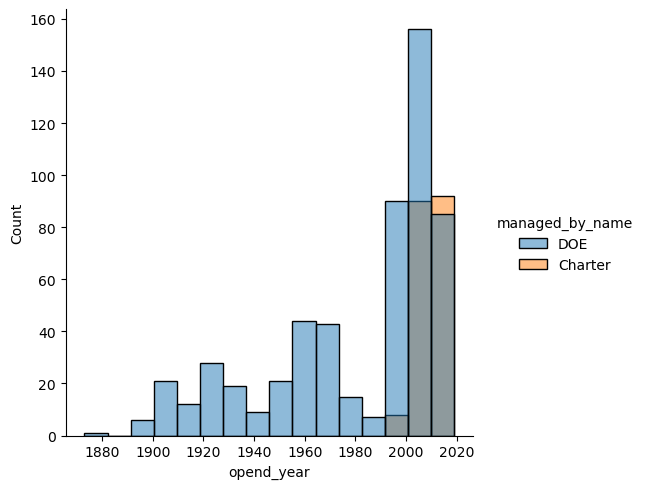

In [12]:
sns.displot(data=df_eleMidCo, x="opend_year",hue="managed_by_name")

In [13]:
df_eleMidNone = pd.merge(df_noneCo, eleMidDBN, how="inner", on=['dbn'])
df_eleMidNone

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,open_date_x,Status_descriptions,Primary_building_code,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Geographical_District_code,Administrative_District_Code,_merge
0,2020.0,15K001,K001,P.S. 001 The Bergen,3.315000e+11,DOE,General Academic,Elementary,1965-07-01T00:00:00.000,Open,K001,309 47 STREET,NY,981081.0,175710.0,-74.011420,40.648959,15.0,15.0,left_only
1,2020.0,13K003,K003,P.S. 003 The Bedford Village,3.313000e+11,DOE,General Academic,Elementary,1950-07-01T00:00:00.000,Open,K003,50 JEFFERSON AVENUE,NY,996670.0,187864.0,-73.955219,40.682311,13.0,13.0,left_only
2,2020.0,17K006,K006,Norma Adams Clemons Academy,3.317000e+11,DOE,General Academic,Elementary,1993-07-01T00:00:00.000,Open,K006,43 SNYDER AVENUE,NY,996382.0,175718.0,-73.956279,40.648973,17.0,17.0,left_only
3,2020.0,19K007,K007,P.S. 007 Abraham Lincoln,3.319000e+11,DOE,General Academic,Elementary,1999-07-01T00:00:00.000,Open,K007,858 JAMAICA AVENUE,NY,1019475.0,190401.0,-73.872983,40.689213,19.0,19.0,left_only
4,2020.0,13K008,K008,P.S. 008 Robert Fulton,3.313000e+11,DOE,General Academic,K-8,1907-07-01T00:00:00.000,Open,K008,37 HICKS STREET,NY,986235.0,194564.0,-73.992841,40.700709,13.0,13.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,2020.0,84X703,X703,Bronx Preparatory Charter School,3.209009e+11,Charter,General Academic,Secondary School,2000-04-04T00:00:00.000,Open,XAFP,3872 THIRD AVENUE,NY,1011886.0,244990.0,-73.900123,40.839072,9.0,84.0,left_only
642,2020.0,84X705,X705,Family Life Academy Charter School,3.209009e+11,Charter,General Academic,Elementary,2000-07-01T00:00:00.000,Open,XABC,14 WEST 170 STREET,NY,1006755.0,245418.0,-73.918665,40.840262,9.0,84.0,left_only
643,2020.0,84X706,X706,Harriet Tubman Charter School,3.209009e+11,Charter,General Academic,K-8,2000-07-01T00:00:00.000,Open,X256,3565 THIRD AVENUE,NY,1010326.0,242531.0,-73.905771,40.832328,9.0,84.0,left_only
644,2020.0,84X717,X717,Icahn Charter School,3.209009e+11,Charter,General Academic,K-8,2000-07-01T00:00:00.000,Open,X717,1506-30 BROOK AVENUE,NY,1010619.0,244836.0,-73.904703,40.838654,9.0,84.0,left_only


In [ ]:
df_eleMidNone

In [14]:
df_eleMidNone.open_date_x = pd.to_datetime(df_eleMidNone.open_date_x,
               format='%Y-%m-%dT%H:%M:%S')
df_eleMidNone['open_date_x']

0     1965-07-01
1     1950-07-01
2     1993-07-01
3     1999-07-01
4     1907-07-01
         ...    
641   2000-04-04
642   2000-07-01
643   2000-07-01
644   2000-07-01
645   2001-07-01
Name: open_date_x, Length: 646, dtype: datetime64[ns]

In [15]:
df_eleMidNone['opend_year'] = df_eleMidNone['open_date_x'].dt.year
df_eleMidNone['opend_year']

0      1965
1      1950
2      1993
3      1999
4      1907
       ... 
641    2000
642    2000
643    2000
644    2000
645    2001
Name: opend_year, Length: 646, dtype: int64

In [16]:
df_eleMidNone[df_eleMidNone['opend_year'] == 2015]

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,open_date_x,Status_descriptions,...,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Geographical_District_code,Administrative_District_Code,_merge,opend_year
170,2020.0,84K766,K766,The International Charter School of New York,3.313009e+11,Charter,General Academic,Elementary,2015-07-01,Open,...,55 Willoughby Street,NY,987892.0,191549.0,-73.986867,40.692434,13.0,84.0,left_only,2015
177,2020.0,84K807,K807,Collegiate Academy for Math and Personal Aware...,3.319009e+11,Charter,General Academic,Junior High-Intermediate-Middle,2015-07-01,Open,...,1962-84 LINDEN BLVD.,NY,1015110.0,178976.0,-73.888775,40.657870,19.0,84.0,left_only,2015
253,2020.0,03M291,M291,West End Secondary School,3.103000e+11,DOE,General Academic,Secondary School,2015-07-01,Open,...,227-243 WEST 61ST STREET,NY,987480.0,220759.0,-73.988338,40.772608,3.0,3.0,left_only,2015
456,2020.0,29Q360,Q360,P.S. 360,3.429000e+11,DOE,General Academic,Elementary,2015-07-01,Open,...,199-10 112 AVENUE,NY,1051832.0,195248.0,-73.756259,40.702329,29.0,29.0,left_only,2015
457,2020.0,30Q361,Q361,The Woodside Community School,3.430000e+11,DOE,General Academic,Elementary,2015-07-01,Open,...,39-07 57th Street,NY,1010327.0,211726.0,-73.906430,40.747701,30.0,30.0,left_only,2015
509,2020.0,31R062,R062,The Kathleen Grimm School for Leadership and S...,3.531000e+11,DOE,General Academic,Elementary,2015-07-01,Open,...,644 Bloomingdale Road,NY,923487.0,136607.0,-74.217934,40.541563,31.0,31.0,left_only,2015
629,2020.0,84X460,X460,Atmosphere Charter School,3.210009e+11,Charter,General Academic,Junior High-Intermediate-Middle,2015-07-01,Open,...,22 MARBLE HILL AVENUE,NY,1009022.0,258135.0,-73.910426,40.875161,10.0,84.0,left_only,2015
632,2020.0,84X486,X486,Rosalyn Yalow Charter School,3.209009e+11,Charter,General Academic,Elementary,2015-07-01,Open,...,116-118 EAST 169 STREET,NY,1007120.0,244113.0,-73.917350,40.836679,9.0,84.0,left_only,2015
633,2020.0,84X492,X492,South Bronx Early College Academy Charter School,3.208009e+11,Charter,General Academic,Junior High-Intermediate-Middle,2015-07-01,Open,...,766 WESTCHESTER AVENUE,NY,1010760.0,237336.0,-73.904223,40.818069,8.0,84.0,left_only,2015
634,2020.0,84X497,X497,Storefront Academy Charter School,3.207009e+11,Charter,General Academic,Elementary,2015-07-01,Open,...,609 JACKSON AVENUE,NY,1009502.0,236199.0,-73.908773,40.814952,7.0,84.0,left_only,2015


In [17]:
highDBN = df_high['dbn']
highDBN

0      01M292
1      01M448
2      01M450
3      01M509
4      01M539
        ...  
480    84X581
481    84X597
482    84X611
483    84X703
484    84X704
Name: dbn, Length: 485, dtype: object

In [18]:
df_highCo = pd.merge(df_coExplode, highDBN, how="inner", on=['dbn'])
df_highCo

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
0,5,01M292,1,Orchard Collegiate Academy,M056,False,226,0,0,226,...,DOE,High school,"09,10,11,12,SE",-73.986051,40.713362,MILES DOYLE,2004-09-08,M,3,2004.0
1,12,01M450,1,East Side Community School,M060,False,680,0,316,364,...,DOE,Secondary School,"06,07,08,09,10,11,12,SE",-73.982472,40.729152,MARK FEDERMAN,1996-06-05,M,2,1996.0
2,14,01M509,1,Marta Valle High School,M025,False,97,0,0,97,...,DOE,High school,"09,10,11,12,SE",-73.986038,40.720040,Andre Rodrigues,1996-06-05,M,3,1996.0
3,20,02M047,2,47 The American Sign Language and English Seco...,M047,False,232,0,0,232,...,DOE,High school,"09,10,11,12,SE",-73.981329,40.738374,WATFA SHAMA,1908-07-01,M,3,1908.0
4,28,02M135,2,The Urban Assembly School for Emergency Manage...,M520,False,256,0,0,256,...,DOE,High school,"09,10,11,12,SE",-74.000851,40.711441,Robert Magliaro,2013-07-01,M,4,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1493,84X597,84,The Urban Assembly Charter School for Computer...,X420,False,224,0,0,224,...,Charter,High school,"09,10",-73.878191,40.832508,David Noah,2018-07-01,X,4,2018.0
418,1497,84X611,84,AECI II: NYC Charter High School for Computer ...,XAFI,False,108,0,0,108,...,Charter,High school,9,-73.921888,40.808703,NaN,2019-07-01,X,2,2019.0
419,1503,84X704,84,KIPP Academy Charter School,X151,False,1088,566,255,267,...,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04,X,4,2000.0
420,1504,84X704,84,KIPP Academy Charter School,X790,False,1088,566,255,267,...,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04,X,1,2000.0


In [19]:
df_highCo[df_highCo['opend_year'] == 2015]

,Unnamed: 0,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
400,1437,84Q320,84,New Visions Charter High School for Advanced M...,Q400,False,488,0,0,488,...,Charter,High school,"09,10,11,12,SE",-73.782684,40.673949,SHARON JOHN,2015-07-01,Q,3,2015.0


In [20]:
df_highNone = pd.merge(df_noneCo, highDBN, how="inner", on=['dbn'])
df_highNone

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,open_date_x,Status_descriptions,Primary_building_code,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Geographical_District_code,Administrative_District_Code,_merge
0,2020.0,22K405,K405,Midwood High School,3.322000e+11,DOE,General Academic,High school,1940-07-01T00:00:00.000,Open,K405,2839 BEDFORD AVENUE,NY,997474.0,169837.0,-73.952356,40.632829,22.0,22.0,left_only
1,2020.0,22K425,K425,James Madison High School,3.322000e+11,DOE,General Academic,High school,1925-07-01T00:00:00.000,Open,K425,3787 BEDFORD AVENUE,NY,998782.0,161702.0,-73.947661,40.610499,22.0,22.0,left_only
2,2020.0,13K430,K430,Brooklyn Technical High School,3.313000e+11,DOE,General Academic,High school,1933-07-01T00:00:00.000,Open,K430,29 FT GREENE PLACE,NY,990785.0,190261.0,-73.976435,40.688896,13.0,13.0,left_only
3,2020.0,20K445,K445,New Utrecht High School,3.320000e+11,DOE,General Academic,High school,1924-07-01T00:00:00.000,Open,K445,1601 80 STREET,NY,983609.0,162624.0,-74.002308,40.613041,20.0,20.0,left_only
4,2020.0,84K473,K473,Williamsburg Charter High School,3.314009e+11,Charter,General Academic,High school,2004-08-31T00:00:00.000,Open,KBYQ,198 VARET STREET,NY,1002004.0,195658.0,-73.935969,40.703703,14.0,84.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2020.0,09X525,X525,Bronx Leadership Academy High School,3.209000e+11,DOE,General Academic,High school,1996-06-05T00:00:00.000,Open,X876,1710 WEBSTER AVENUE,NY,1011097.0,246511.0,-73.902969,40.843250,9.0,9.0,left_only
95,2020.0,12X682,X682,Fannie Lou Hamer Freedom High School,3.212000e+11,DOE,General Academic,High school,1994-09-01T00:00:00.000,Open,X878,1021 JENNINGS STREET,NY,1015852.0,242131.0,-73.885804,40.831212,12.0,12.0,left_only
96,2020.0,12X684,X684,Wings Academy,3.212000e+11,DOE,General Academic,High school,1996-06-05T00:00:00.000,Open,X879,1122 EAST 180 STREET,NY,1018764.0,245838.0,-73.875262,40.841376,12.0,12.0,left_only
97,2020.0,10X696,X696,High School of American Studies at Lehman College,3.210000e+11,DOE,General Academic,High school,2002-07-01T00:00:00.000,Open,X905,2925 GOULDEN AVENUE,NY,1013138.0,257981.0,-73.895543,40.874725,10.0,10.0,left_only


In [21]:
df_highNone.open_date_x = pd.to_datetime(df_highNone.open_date_x,
               format='%Y-%m-%dT%H:%M:%S')
df_highNone['open_date_x']

0    1940-07-01
1    1925-07-01
2    1933-07-01
3    1924-07-01
4    2004-08-31
        ...    
94   1996-06-05
95   1994-09-01
96   1996-06-05
97   2002-07-01
98   2000-04-04
Name: open_date_x, Length: 99, dtype: datetime64[ns]

In [22]:
df_highNone['opend_year'] = df_highNone['open_date_x'].dt.year
df_highNone['opend_year']

0     1940
1     1925
2     1933
3     1924
4     2004
      ... 
94    1996
95    1994
96    1996
97    2002
98    2000
Name: opend_year, Length: 99, dtype: int64

In [23]:
df_highNone[df_highNone['opend_year'] == 2015]

,fiscal_year,dbn,location_code_x,location_name_x,BEDS,Managed_by_name,location_type_description,Location_Category_Description,open_date_x,Status_descriptions,...,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Geographical_District_code,Administrative_District_Code,_merge,opend_year
26,2020.0,03M291,M291,West End Secondary School,3.103000e+11,DOE,General Academic,Secondary School,2015-07-01,Open,...,227-243 WEST 61ST STREET,NY,987480.0,220759.0,-73.988338,40.772608,3.0,3.0,left_only,2015
90,2020.0,84X429,X429,Charter High School for Law and Social Justice,3.210009e+11,Charter,General Academic,High school,2015-07-01,Open,...,1960 UNIVERSITY AVENUE,NY,1008675.0,250326.0,-73.911708,40.853728,10.0,84.0,left_only,2015


In [27]:
df_noExploe

,Unnamed: 0,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,...,location_name,geographical_district_code,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code
0,0,01M015,1,P.S. 015 Roberto Clemente,False,M015,False,190,190,0,...,P.S. 015 Roberto Clemente,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01T00:00:00.000,M
1,1,01M063,1,The STAR Academy - P.S.63,False,M063,False,229,229,0,...,The STAR Academy - P.S.63,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01T00:00:00.000,M
2,2,01M064,1,P.S. 064 Robert Simon,False,M064,False,236,236,0,...,P.S. 064 Robert Simon,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01T00:00:00.000,M
3,3,01M142,1,P.S. 142 Amalia Castro,False,M142,False,329,329,0,...,P.S. 142 Amalia Castro,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01T00:00:00.000,M
4,4,01M188,1,P.S. 188 The Island School,False,M188,False,398,238,160,...,P.S. 188 The Island School,1.0,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01T00:00:00.000,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1074,84X616,84,KIPP Elements Primary Charter School,False,X859,False,181,181,0,...,KIPP Elements Primary Charter School,10.0,Charter,Elementary,"0K,01",-73.903764,40.857932,Sarah English/Diamond Graham,2019-07-01T00:00:00.000,X
1075,1075,84X617,84,KIPP All Charter School,False,X859,False,179,89,90,...,KIPP All Charter School,10.0,Charter,K-8,"05,06",-73.903764,40.857932,Kate Baughman,2019-07-01T00:00:00.000,X
1076,1076,84X623,84,Neighborhood Charter School: Bronx,False,XBPP,False,107,107,0,...,Neighborhood Charter School: Bronx,7.0,Charter,Elementary,"0K,01",-73.909019,40.808963,NaN,2019-07-01T00:00:00.000,X
1077,1077,84X704,84,KIPP Academy Charter School,True,"X151, X790, XAVN",False,1088,566,255,...,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000,X


In [28]:
df_allcoDBN = df_noExploe[['dbn','building_id','managed_by_name','open_date']]
df_allcoDBN

,dbn,building_id,managed_by_name,open_date
0,01M015,M015,DOE,1904-07-01T00:00:00.000
1,01M063,M063,DOE,1905-07-01T00:00:00.000
2,01M064,M064,DOE,1954-07-01T00:00:00.000
3,01M142,M142,DOE,1976-07-01T00:00:00.000
4,01M188,M188,DOE,1904-07-01T00:00:00.000
...,...,...,...,...
1074,84X616,X859,Charter,2019-07-01T00:00:00.000
1075,84X617,X859,Charter,2019-07-01T00:00:00.000
1076,84X623,XBPP,Charter,2019-07-01T00:00:00.000
1077,84X704,"X151, X790, XAVN",Charter,2000-05-04T00:00:00.000


In [45]:
df_count

borough_code  location_category_description  
K             Early Childhood                      1
              Elementary                          98
              High school                         95
              Junior High-Intermediate-Middle     76
              K-12 all grades                     19
              K-8                                 39
              Secondary School                    25
M             Elementary                          62
              High school                         79
              Junior High-Intermediate-Middle     34
              K-12 all grades                     18
              K-8                                 23
              Secondary School                    16
              Ungraded                             1
Q             Elementary                          38
              High school                         56
              Junior High-Intermediate-Middle     28
              K-12 all grades                      6
